In [2]:
import pandas as pd

In [3]:
stations = pd.read_csv(r'/Users/glebpetrov/Bus Data/train-dataset_stations_4.csv', sep='\t')

In [4]:
routes = pd.read_csv(r'/Users/glebpetrov/Bus Data/train-dataset_routes_4.csv', sep='\t')

In [5]:
stations.head()

,id,line_name,station_name,lon,lat,route_numbers
0,0,Sokolnicheskaya,"Севастопольский просп. (к/ст, выс.)",37.562346,55.649894,А1
1,1,Sokolnicheskaya,Просп. Вернадского,37.523794,55.685383,А1
2,2,Sokolnicheskaya,Социальный центр,37.528568,55.683328,А1
3,3,Sokolnicheskaya,"Ул. Крупской, 2",37.532947,55.680800,А1
4,4,Sokolnicheskaya,Социальный центр,37.528254,55.682793,А1


In [6]:
routes.head()

,id_from,id_to
0,0,1
1,1,2
2,2,3
3,3,4
4,5,6


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Dict, List

from collections import Counter

In [8]:
def metro_graph(stations, routes):
    
    graph = nx.Graph()

    stations_nodes = stations['id'].tolist()
    routes_edges = zip(routes['id_from'], routes['id_to'])
    
    graph.add_nodes_from(stations_nodes)
    graph.add_edges_from(routes_edges)

    nx.set_node_attributes(graph, stations['station_name'].to_dict(), 'station_name')
    nx.set_node_attributes(graph, stations['line_name'].to_dict(), 'line_name')

    return graph

In [9]:
G = metro_graph(stations, routes)

In [10]:
print(nx.info(G))

Graph with 2004 nodes and 1857 edges


In [11]:
print('Directed: ', nx.is_directed(G))
print('Weighted: ', nx.is_weighted(G))

Directed:  False
Weighted:  False


Degree : number of nodes
------------------------
1 : 294
2 : 1710


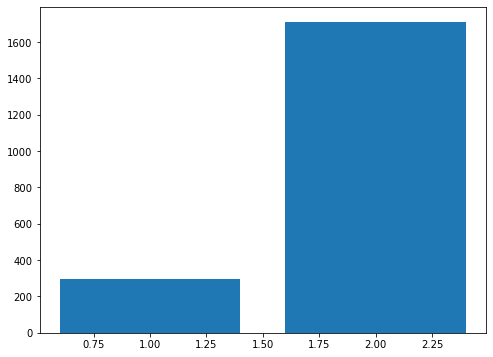

In [12]:
deg_sequence = [d for n, d in G.degree()]
count = Counter(deg_sequence)
print('Degree : number of nodes')
print('------------------------')
for item in count.items():
  print(item[0], ':', item[1])
his = np.histogram(deg_sequence, bins = len(deg_sequence))


plt.figure(figsize = (8, 6))
plt.bar(his[1][1:], his[0], align = 'center')
plt.show()

In [13]:
def metro_layout(stations):

    coordinates = stations[['id', 'lat', 'lon']].values
    layout = {}
    
    for coordinate in coordinates:
      layout[int(coordinate[0])] = [coordinate[2], coordinate[1]]
                 
    return layout

In [14]:
pos = metro_layout(stations)

In [15]:
line_color = {
    'Sokolnicheskaya': 'blue'
}

In [16]:
def station_color(G, line_color = line_color):

    lines = nx.get_node_attributes(G, 'line_name')
    colors = {color: line_color[lines[color]] for color in lines}

    return colors

In [17]:
nx.set_node_attributes(G, station_color(G), 'color')

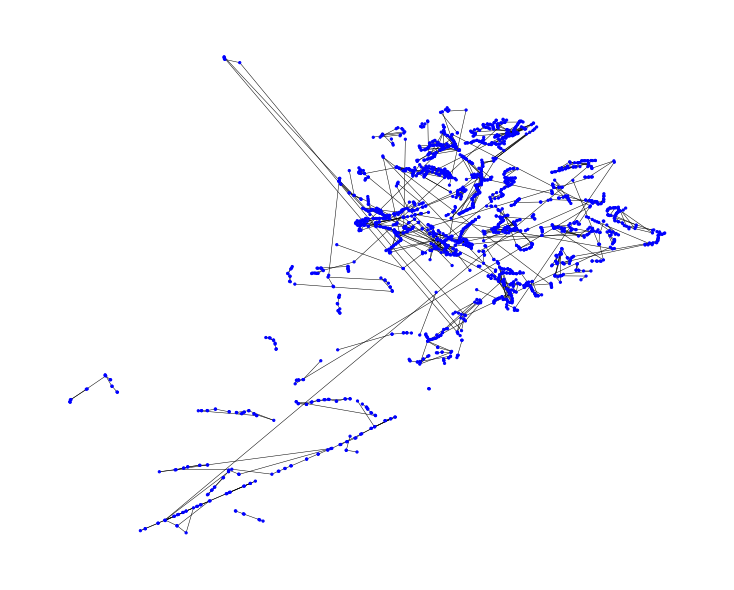

In [18]:
plt.figure(figsize=(10, 8))
nx.draw(G, 
        pos,
        width = 0.5,
        node_color = list(nx.get_node_attributes(G, 'color').values()),
        node_size=5)
plt.show()

In [38]:
def centralities(G):
    
    return {
        'degree': np.array(list(nx.degree_centrality(G).values())),
        'eigenvector': np.array(list(nx.eigenvector_centrality(G, max_iter=1000)())),
        'betweenness': np.array(list(nx.betweenness_centrality(G).values())),
        'closeness': np.array(list(nx.closeness_centrality(G).values())),    
        'pagerank': np.array(list(nx.pagerank(G).values())),
        'katz': np.array(list(nx.katz_centrality(G).values()))
    }

In [39]:
c = centralities(G)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')

In [ ]:
def top10_centralities(G):

    r = {}
    
    for n, f in zip(['degree', 'eigenvector', 'betweenness', 'closeness', 'pagerank', 'katz'], [nx.degree_centrality, nx.eigenvector_centrality, nx.betweenness_centrality, nx.closeness_centrality, nx.pagerank, nx.katz_centrality]):
        if f == nx.eigenvector_centrality:
          sort = sorted(list(f(G, max_iter = 1000).items()), key = lambda x: x[1], reverse = True)
        else:
          sort = sorted(list(f(G).items()), key = lambda x: x[1], reverse = True)
        ids, centrality = zip(*sort)
        station_names = [nx.get_node_attributes(G, 'station_name')[y] for y in ids]
        line_names = [nx.get_node_attributes(G, 'line_name')[y] for y in ids]
        r[n] = pd.DataFrame({'station': station_names, 'line': line_names, 'centrality': centrality})
    
    return r

In [ ]:
top_dfs = top10_centralities(G)

In [36]:
for c_key, scale, title in [['degree', 5000, 'Degree centrality']]:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize = (10, 8))
    nx.draw(G, 
            pos,
            width = 0.5,
            linewidths = 0.5,
            edgecolors = 'black',
            cmap = plt.cm.hot,
            node_size = c[c_key] * scale,
            node_color = c[c_key])
    plt.show()

Degree centrality


NameError: name 'top_dfs' is not defined

In [ ]:
for c_key, scale, title in [['eigenvector', 2000, 'Eigenvector centrality']]:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize = (10, 8))
    nx.draw(G, 
            pos,
            width = 0.5,
            linewidths = 0.5,
            edgecolors = 'black',
            cmap = plt.cm.bone,
            node_size = c[c_key] * scale,
            node_color = c[c_key])
    plt.show()

In [ ]:
for c_key, scale, title in [['betweenness', 1000, 'Betweenness centrality']]:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize = (10, 8))
    nx.draw(G, 
            pos,
            width = 0.5,
            linewidths = 0.5,
            edgecolors = 'black',
            cmap = plt.cm.winter,
            node_size = c[c_key] * scale,
            node_color = c[c_key])
    plt.show()

In [ ]:
for c_key, scale, title in [['closeness', 1000, 'Closeness centrality']]:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize = (10, 8))
    nx.draw(G, 
            pos,
            width = 0.5,
            linewidths = 0.5,
            edgecolors = 'black',
            cmap = plt.cm.pink,
            node_size = c[c_key] * scale,
            node_color = c[c_key])
    plt.show()

In [ ]:
for c_key, scale, title in [['pagerank', 10000, 'PageRank centrality']]:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize = (10, 8))
    nx.draw(G, 
            pos,
            width = 0.5,
            linewidths = 0.5,
            edgecolors = 'black',
            cmap = plt.cm.cool,
            node_size = c[c_key] * scale,
            node_color = c[c_key])
    plt.show()

In [ ]:
for c_key, scale, title in [['katz', 1000, 'Katz centrality']]:
    print(title)
    display(top_dfs[c_key])
    plt.figure(figsize = (10, 8))
    nx.draw(G, 
            pos,
            width = 0.5,
            linewidths = 0.5,
            edgecolors = 'black',
            cmap = plt.cm.copper,
            node_size = c[c_key] * scale,
            node_color = c[c_key])
    plt.show()